# Thông Tin Sinh Viên
1. Họ tên: Võ Khoa Nam
2. Mssv: 19521877
3. Lớp: CS116.M12.KHCL

# BÀI TẬP 2

# Clone dữ liệu từ github 

In [1]:
!git clone https://github.com/Cityscope/CSL_HCMC

Cloning into 'CSL_HCMC'...
remote: Enumerating objects: 1930, done.
remote: Counting objects: 100% (590/590), done.
remote: Compressing objects: 100% (314/314), done.
remote: Total 1930 (delta 309), reused 500 (delta 270), pack-reused 1340
Receiving objects: 100% (1930/1930), 178.53 MiB | 25.82 MiB/s, done.
Resolving deltas: 100% (986/986), done.
Checking out files: 100% (542/542), done.


# Cài đặt một số thư viện

In [5]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import geopandas

In [4]:
pip install geopandas

     |████████████████████████████████| 994 kB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 18.8 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 


# Đọc file

In [19]:
data1 = geopandas.read_file('/content/CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp')
data1

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,208475.0,211220.0,142625.0,23360.4000,24294.9000,24292.9000,24749.600,25589.300,25962.100,25098.200,27022.100,27377.900,18486.8000,15274.835115,7.714899e+06,"POLYGON ((684948.318 1193882.223, 684971.256 1..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,198104.0,199095.0,190375.0,38688.6000,38362.1000,38704.4000,38897.100,39227.200,39326.300,39862.100,40221.700,40422.900,38652.5000,12182.058264,4.925215e+06,"POLYGON ((684382.122 1193521.050, 684410.753 1..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,186995.0,183894.0,175329.0,43311.1000,43857.0000,44204.0000,44428.400,44466.500,44789.300,44686.400,44750.600,44008.400,41958.7000,9483.716891,4.178668e+06,"POLYGON ((687625.438 1189132.516, 687615.280 1..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,260742.0,262757.0,233561.0,34910.5000,35490.8000,35594.2000,36105.700,37261.600,36010.200,36256.900,36508.500,36790.600,32702.7000,13077.365262,7.140945e+06,"POLYGON ((679534.413 1187518.498, 679077.904 1..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.3900,7796.0600,7616.0700,7563.590,7963.850,8418.120,8798.840,9006.200,9282.350,10216.5000,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1..."
5,District 10,771,District,230345.0,232450.0,236336.0,237086.0,239180.0,238755.0,238558.0,239826.0,241327.0,234819.0,40354.6000,40723.4000,41404.2000,41535.600,41902.500,41828.000,41793.500,42015.600,42278.600,41138.5000,10478.512538,5.707881e+06,"POLYGON ((682507.505 1189929.778, 682485.431 1..."
6,District 11,772,District,226854.0,232536.0,236443.0,233499.0,227860.0,228030.0,230596.0,234291.0,237110.0,209867.0,44207.9000,45315.2000,46076.6000,45502.900,44404.000,44437.100,44937.200,45657.200,46206.600,40897.6000,10833.546511,5.131351e+06,"POLYGON ((681349.265 1190928.179, 681382.887 1..."
7,Phu Nhuan,768,District,174535.0,175175.0,177242.0,179917.0,180456.0,182821.0,182477.0,181780.0,183288.0,163961.0,35692.6000,35823.5000,36246.2000,36793.300,36903.500,37387.100,37316.800,37174.300,37482.600,33530.3000,12392.134315,4.889837e+06,"POLYGON ((682877.988 1195927.612, 682969.684 1..."
8,Tan Binh,766,District,421724.0,430436.0,434298.0,440351.0,443061.0,448989.0,455029.0,469526.0,470699.0,474792.0,18796.9000,19185.2000,19357.3000,19627.100,19747.900,20012.100,20281.400,20927.500,20979.800,21162.2000,23807.894025,2.243513e+07,"POLYGON ((680274.980 1198401.860, 680578.965 1..."
9,Binh Thanh,765,District,457362.0,470054.0,484135.0,484423.0,482833.0,485772.0,487985.0,489657.0,490618.0,499164.0,22005.5000,22616.2000,23293.7000,23307.600,23231.100,23372.500,23478.900,23559.400,23605.600,24016.8000,29544.712130,2.078389e+07,"POLYGON ((684986.154 1194412.964, 684987.226 1..."


# Vẽ ranh giới các quận lên bản đồ

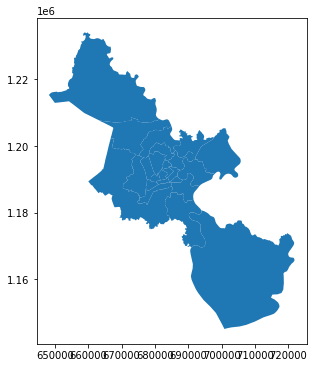

In [20]:
data1.plot(figsize=(6, 6))
plt.show()

In [21]:
data1 = data1.to_crs(epsg=4326)
print(data1.crs)
data1.head()

epsg:4326


,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,208475.0,211220.0,142625.0,23360.40,24294.90,24292.90,24749.60,25589.30,25962.10,25098.20,27022.1,27377.90,18486.8,15274.835115,7.714899e+06,"POLYGON ((106.69160 10.79553, 106.69181 10.795..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,198104.0,199095.0,190375.0,38688.60,38362.10,38704.40,38897.10,39227.20,39326.30,39862.10,40221.7,40422.90,38652.5,12182.058264,4.925215e+06,"POLYGON ((106.68641 10.79229, 106.68667 10.792..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,186995.0,183894.0,175329.0,43311.10,43857.00,44204.00,44428.40,44466.50,44789.30,44686.40,44750.6,44008.40,41958.7,9483.716891,4.178668e+06,"POLYGON ((106.71584 10.75245, 106.71574 10.752..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,260742.0,262757.0,233561.0,34910.50,35490.80,35594.20,36105.70,37261.60,36010.20,36256.90,36508.5,36790.60,32702.7,13077.365262,7.140945e+06,"POLYGON ((106.64179 10.73826, 106.63760 10.735..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.39,7796.06,7616.07,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.915360,3.525220e+07,"POLYGON ((106.75137 10.76062, 106.75001 10.758..."


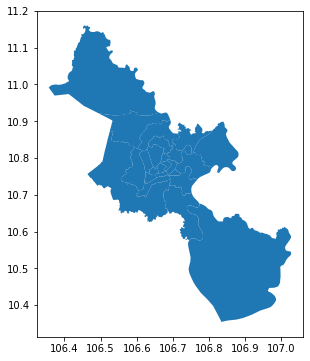

In [22]:
data1.plot(figsize=(6, 6))
plt.show()

In [30]:
m = folium.Map(location=[15.9030623 ,105.8066925], zoom_start=10, tiles='CartoDB positron')
m

In [31]:
for _, r in data1.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = geopandas.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'green'})
    folium.Popup(r['Dist_Name']).add_to(geo_j)
    geo_j.add_to(m)
m

In [32]:
# Project to NAD83 projected crs
data1 = data1.to_crs(epsg=2263)

# Access the centroid attribute of each polygon
data1['centroid'] = data1.centroid

In [33]:
# geometry (active) column
data1 = data1.to_crs(epsg=4326)

# Centroid column
data1['centroid'] = data1['centroid'].to_crs(epsg=4326)

data1.head()

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,centroid
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,208475.0,211220.0,142625.0,23360.40,24294.90,24292.90,24749.60,25589.30,25962.10,25098.20,27022.1,27377.90,18486.8,15274.835115,7.714899e+06,"POLYGON ((106.69160 10.79553, 106.69181 10.795...",POINT (106.69713 10.77622)
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,198104.0,199095.0,190375.0,38688.60,38362.10,38704.40,38897.10,39227.20,39326.30,39862.10,40221.7,40422.90,38652.5,12182.058264,4.925215e+06,"POLYGON ((106.68641 10.79229, 106.68667 10.792...",POINT (106.68283 10.78144)
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,186995.0,183894.0,175329.0,43311.10,43857.00,44204.00,44428.40,44466.50,44789.30,44686.40,44750.6,44008.40,41958.7,9483.716891,4.178668e+06,"POLYGON ((106.71584 10.75245, 106.71574 10.752...",POINT (106.70549 10.75845)
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,260742.0,262757.0,233561.0,34910.50,35490.80,35594.20,36105.70,37261.60,36010.20,36256.90,36508.5,36790.60,32702.7,13077.365262,7.140945e+06,"POLYGON ((106.64179 10.73826, 106.63760 10.735...",POINT (106.63519 10.74585)
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.39,7796.06,7616.07,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.915360,3.525220e+07,"POLYGON ((106.75137 10.76062, 106.75001 10.758...",POINT (106.72941 10.73640)


In [34]:
for _, r in data1.iterrows():
    lat = r['centroid'].y
    lon = r['centroid'].x
    folium.Marker(location=[lat, lon],
                  popup='length: {} <br> area: {}'.format(r['Shape_Leng'], r['Shape_Area'])).add_to(m)

In [35]:
m

# References
1. https://geopandas.readthedocs.io/en/latest/gallery/polygon_plotting_with_folium.html